For the first test I am going to use the class, sex, age, sibsp, parch, and fare columns.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
path = 'http://classes.cs.uoregon.edu/18F/cis199ids/data/'
file = path + 'titanic_all.csv'
ship = pd.read_csv(file)

In [3]:
ship.sample(n=10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1208,3,0,"Skoog, Miss. Mabel",female,9.0,3,2,347088,27.9000,NaN,S,NaN,NaN,NaN
591,2,1,"West, Miss. Constance Mirium",female,5.0,1,2,C.A. 34651,27.7500,NaN,S,10,NaN,"Bournmouth, England"
265,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S,7,NaN,"New Britain, CT"
914,3,0,"Karlsson, Mr. Julius Konrad Eugen",male,33.0,0,0,347465,7.8542,NaN,S,NaN,NaN,NaN
90,1,1,"Davidson, Mrs. Thornton (Orian Hays)",female,27.0,1,2,F.C. 12750,52.0000,B71,S,3,NaN,"Montreal, PQ"
448,2,0,"Hocking, Mr. Samuel James Metcalfe",male,36.0,0,0,242963,13.0000,NaN,S,NaN,NaN,"Devonport, England"
1173,3,0,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.5500,NaN,S,NaN,NaN,NaN
531,2,0,"Pernot, Mr. Rene",male,NaN,0,0,SC/PARIS 2131,15.0500,NaN,C,NaN,NaN,NaN
505,2,0,"Milling, Mr. Jacob Christian",male,48.0,0,0,234360,13.0000,NaN,S,NaN,271.0,"Copenhagen, Denmark"
471,2,1,"Kelly, Mrs. Florence ""Fannie""",female,45.0,0,0,223596,13.5000,NaN,S,9,NaN,"London / New York, NY"


In [4]:
ship = ship.drop(['name', 'ticket', 'cabin', 'embarked', 'boat', 'body', 'home.dest'], axis=1)

In [5]:
ship['sex'].replace(('male', 'female'), (0, 1), inplace=True)
ship['age'] = ship['age'].fillna(ship['age'].median())
ship['fare'] = ship['fare'].fillna(ship['fare'].median())
ship.sample(n=10)

,pclass,survived,sex,age,sibsp,parch,fare
971,3,0,0,28.00,0,0,7.8792
49,1,1,0,36.00,0,1,512.3292
771,3,1,1,19.00,0,0,7.8792
649,3,0,0,23.00,0,0,7.0500
198,1,1,1,18.00,1,0,53.1000
733,3,1,0,9.00,1,1,15.9000
1,1,1,0,0.92,1,2,151.5500
615,3,0,0,20.00,0,0,7.9250
869,3,0,0,28.00,0,0,22.5250
537,2,0,0,34.00,0,0,13.0000


Now I can split the data into features (X) and targets (y). The targets will be whether or not the passenger survived, and the features will be all of the other columns.

In [6]:
X_ship = ship.drop('survived', axis=1)

In [7]:
y_ship = ship['survived']

Now I can split the features and targets into train and test data using the Naive Bayes' model to make predictions.

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_ship, y_ship, test_size=0.30, random_state=199)

In [10]:
from sklearn.naive_bayes import GaussianNB

In [11]:
model = GaussianNB( )

In [12]:
model.fit(X_train, y_train)

GaussianNB(priors=None)

In [13]:
y_predictions = model.predict(X_test)

Lastly, I will check the accuracy of our predictions

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predictions)

0.7582697201017812

The predictions yielded a 75% accuracy score.

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
model = DecisionTreeClassifier(max_leaf_nodes=2,
                               max_depth=3,
                               min_samples_leaf=25,
                               criterion='gini',
                               splitter='random',
                               random_state=199)

model.fit(X_train, y_train);

y_predictions = model.predict(X_test)

accuracy_score(y_test, y_predictions)

0.7633587786259542

In [17]:
my_columns = ['pcalss', 'sex', 'age', 'sibsp', 'parch', 'fare']

In [18]:
from sklearn.tree import export_graphviz

dot_data = export_graphviz(model,
                           out_file='titanic.dot',
                           feature_names=my_columns,
                           class_names=['dies', 'survives'],
                           rounded=True,
                           filled=True)

In [19]:
!dot -Tjpg titanic.dot -o my-titanic-decision-tree14-6-4.jpg

'dot' is not recognized as an internal or external command,
operable program or batch file.


Just like the previous test, it seems as if the fewer amount of nodes I have, the higher my accuracy score is. The best I got was when max_leaf_nodes=2,
             max_depth=3,
             min_samples_leaf=25,

In [20]:
from sklearn.ensemble import RandomForestRegressor

In [25]:
rf = RandomForestRegressor(n_estimators=300,
                           max_depth=4,
                           max_features=6,
                           random_state=199)

rf.fit(X_train, y_train);

predictions = rf.predict(X_test)
accuracy_score(y_test, predictions.round())

0.7938931297709924

Text(92.68,0.5,'predicted label')

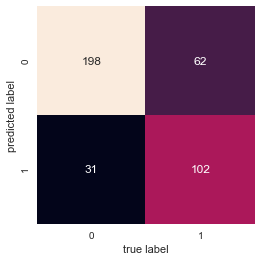

In [22]:
sns.set()
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_predictions)
#mat.T creates the transpose of the matrix mat
#fmt='d' format for (int) 'digits'
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')